In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

## Data

In [13]:
sentences = []

for i in range(100000):
    start = np.random.randint(0,10)
    finish = start + np.random.randint(3,20)
    sentence = [str(x) for x in range(start, finish)]
    sentences.append(sentence)

## Model Word2Vec

In [15]:
model = Word2Vec(sentences, size=10, window=4, min_count=1)

In [16]:
model.wv['1']

array([-4.01538  , -0.8106661,  1.419095 , -4.9901605, -0.9511112,
       -2.625546 , -2.1967678, -0.845461 ,  1.2709767, -2.4081476],
      dtype=float32)

In [20]:
def plot_heatmap(model):
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=.5)

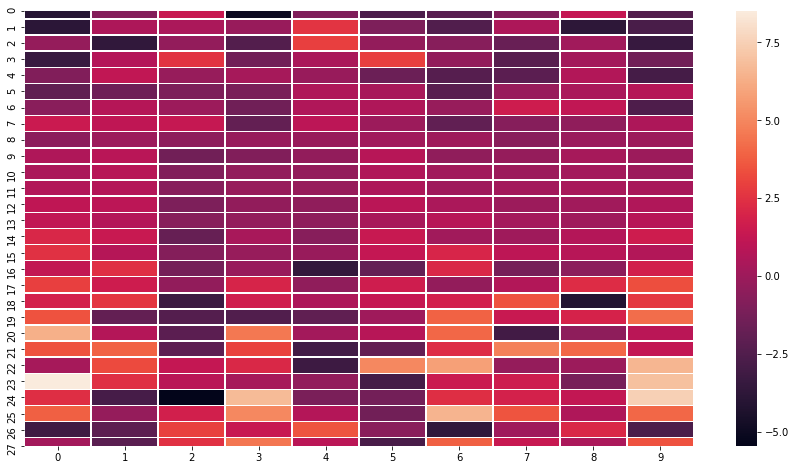

In [21]:
plot_heatmap(model)

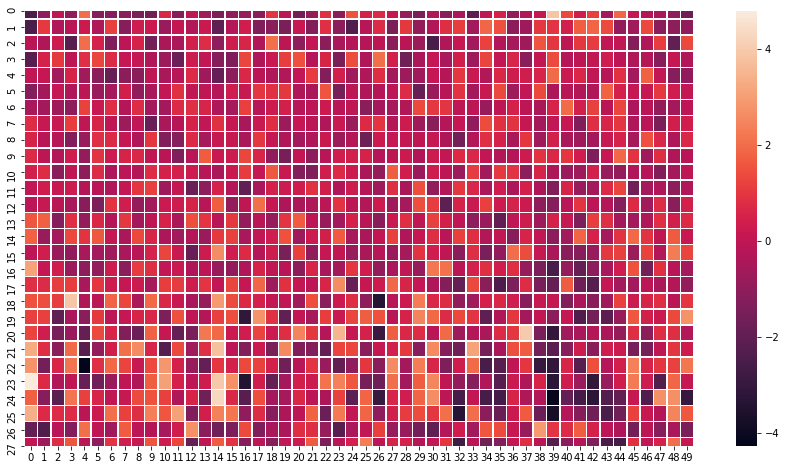

In [23]:
plot_heatmap(Word2Vec(sentences, size=50, window=4, min_count=1))

## PCA

In [36]:
def plot_pca(model):    
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components = 2)
    result = pca_model.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(result[:,0], result[:,1])

    words = list(model.wv.vocab)
    for i, w in enumerate(words):
        plt.annotate(w, xy =(result[i,0], result[i,1]))

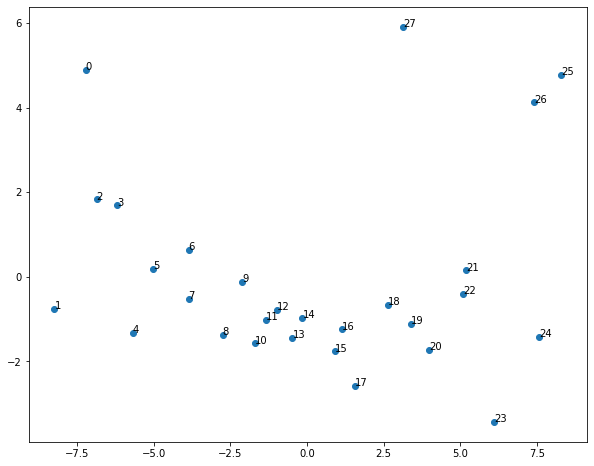

In [37]:
plot_pca(model)

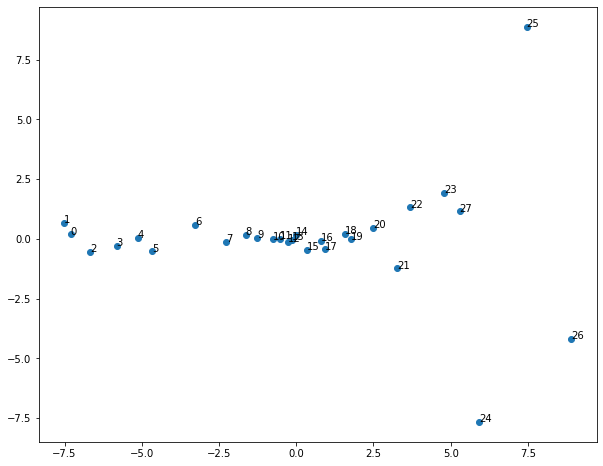

In [38]:
plot_pca(Word2Vec(sentences, size=50, window=10))

## Similar words

In [41]:
model.wv.most_similar('26', topn=5)

[('27', 0.8578205108642578),
 ('25', 0.6450067162513733),
 ('24', 0.6348973512649536),
 ('16', 0.5951402187347412),
 ('22', 0.5936221480369568)]

In [45]:
model.wv.most_similar(positive=['10','8'], negative=['5'], topn=5)

[('13', 0.7401875257492065),
 ('12', 0.7292694449424744),
 ('15', 0.6605347990989685),
 ('14', 0.6601403951644897),
 ('11', 0.6244393587112427)]

In [47]:
10 + 8 - 3

15